In [62]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

sns.set_style("darkgrid")

def rm_outliers(df):
    return df[np.abs(df - df.mean()) <= 3*df.std()]

def plot_stuff(f, name):
    data = pd.read_csv(f)
    eg = rm_outliers(data['eg'])
    ch = rm_outliers(data['ch'])
    
    describe = {'eg': eg.describe(), 'ch': ch.describe()}
    print name
    print '---'
    print describe['eg']
    print '---'
    print describe['ch']
    
    sns.distplot(eg, hist=False, kde_kws={'label': 'eg'})
    sns.distplot(ch, hist=False, kde_kws={'label': 'ch'})
    
    lower = min([describe[x]['mean'] - 3*describe[x]['std'] for x in ('eg', 'ch')])
    upper = max([describe[x]['mean'] + 3*describe[x]['std'] for x in ('eg', 'ch')])
    plt.xlabel('nanosegundos')
    plt.xlim(lower, upper)
    
    plt.savefig(name+'.png', format='png', bbox_inches = 'tight', dpi = 100)
    plt.show()

## ATP y NBA distribution

## Comparar a varios tamaños de N:M

## misma C, b cambia

## generador mismo match count??

## Cholesky vs EG
En un sistema con 1000 partidos, el método mas eficaz depende de la cantidad de equipos que juegan.

nba
---
count     1983.000000
mean     26389.130106
std       3118.661206
min      16273.000000
25%      25387.000000
50%      26749.000000
75%      26958.000000
max      38202.000000
Name: eg, dtype: float64
---
count     1974.000000
mean     24619.670213
std       1968.837305
min      19136.000000
25%      24165.000000
50%      25631.000000
75%      25841.000000
max      34292.000000
Name: ch, dtype: float64


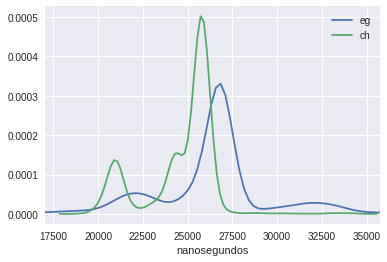

atp
---
count     1997.000000
mean     39311.265398
std       1042.072537
min      26741.000000
25%      39278.000000
50%      39326.000000
75%      39397.000000
max      49650.000000
Name: eg, dtype: float64
---
count     1983.000000
mean     19039.206253
std        301.929719
min      18640.000000
25%      18933.000000
50%      19005.000000
75%      19074.500000
max      23801.000000
Name: ch, dtype: float64


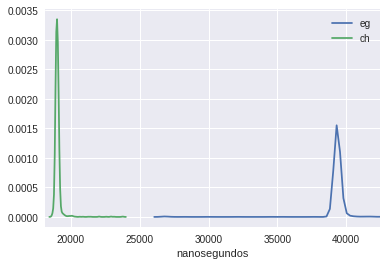

In [63]:
#plot_stuff('csv/20_1000.csv', '20 equipos')
#plot_stuff('csv/200_1000.csv', '200 equipos')
#plot_stuff('csv/500_1000.csv', '500 equipos')
plot_stuff('csv/nba.csv', 'nba')
plot_stuff('csv/atp.csv', 'atp')


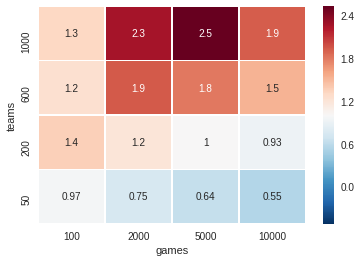

In [64]:
d={'games':[],'teams':[], 'ratio':[]}
for t in [50,200,600,1000]:
    for g in [100,2000,5000,10000]:
        data = pd.read_csv('csv/{}_{}.csv'.format(t,g))
        eg = rm_outliers(data['eg'])
        ch = rm_outliers(data['ch'])
        d['games'].append(g)
        d['teams'].append(t)
        d['ratio'].append(eg.mean()/ch.mean())

df = pd.DataFrame(d)
df = df.pivot('teams', 'games', 'ratio')[::-1]
sns.heatmap(df, annot=True, linewidths=.5, center=1)
plt.savefig('heatmap.png', format='png', bbox_inches = 'tight', dpi = 100)
plt.show()